170


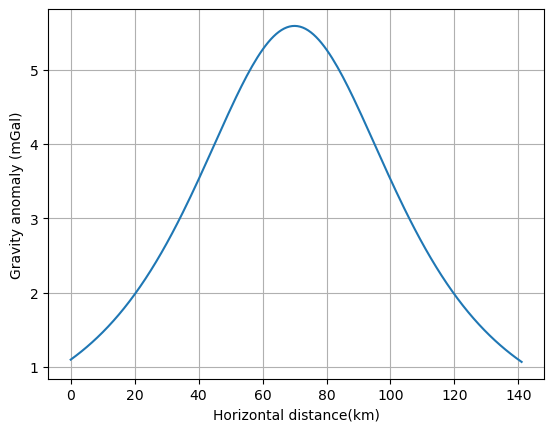

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67*10**(-11) # SI unit
rho=500 #kg/m^3
x=np.linspace(0,141,170)
z=50 #km
a=10 #km   #radius of the sphere. sphere has centre at x coordinate 70
def calculate_g(a,x,z,rho):
    term1=(4/3)*np.pi*G*rho*a**3
    term2=((x-70)**2+z**2)**(3/2)
    g=term1*(z/term2)*10**8 #mGal
    return g
    
g=calculate_g(a,x,z,rho) 
plt.plot(x,g)
# plt.legend(loc='upper right')
plt.xlabel('Horizontal distance(km)')
plt.ylabel('Gravity anomaly (mGal)')
plt.grid()
print(len(g))
# print(g)

In [2]:
#Paper :
# "Rapid Gravity Computations for Two-Dimensional Bodies With Application to the Mendocino Submarine Fracture Zone"
# Authors: Manik Talwani,J Lamar Worzel and Mark Landisman

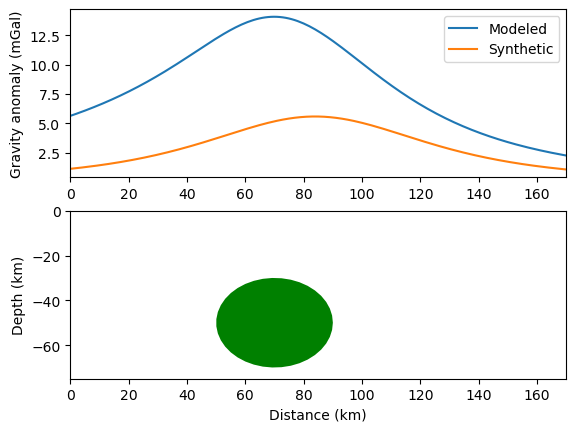

170


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, cos, sin, log, pi ,tan

def aieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate ai for given vertices and observation point."""
    return (xiplus1eq - Pxeq) + (ziplus1eq * ((xiplus1eq - Pxeq) - (xieq - Pxeq)) / (zieq - ziplus1eq))
    #in input file , the consecutive z values must be different..so that zi and z(i+1) are different
def thetaieq(xieq, zieq, Pxeq):
    """Calculate theta i for given vertex and observation point."""
    return atan2(zieq, (xieq - Pxeq))

def thetaiplus1eq(xiplus1eq, ziplus1eq, Pxeq):
    """Calculate theta i+1 for given vertex and observation point."""
    return atan2(ziplus1eq, (xiplus1eq - Pxeq))

def phiieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate phi for given vertices and observation point."""
    return atan2((ziplus1eq - zieq), ((xiplus1eq - Pxeq) - (xieq - Pxeq)))

# Setup the subplot for the subsurface bodies
plt.subplot(2, 1, 2)
maxdistance, maxdepth = 170, 75  # kilometers
Px = np.linspace(-1, maxdistance, maxdistance).tolist()
G = 6.67e-11  # Gravitational constant in m^3 kg^-1 s^-2, adjusted to correct value
# rho=500
input_file = open('gravity_input_data.txt', 'r')
readfile = input_file.read()
allbodies = readfile.split('Body ')[1:]
Zsummed = np.zeros(len(Px))

for body in allbodies:
    lines = body.strip().split('\n')
    label = lines[0]
#     rho = float(lines[1])
    vertices = [(float(x), float(y)) for x, y in (line.split('\t') for line in lines[2:])]

    for i in range(len(vertices)):
        Z = []
        xi, zi = vertices[i]
        xiplus1, ziplus1 = vertices[(i + 1) % len(vertices)]
        
        for Pxi in Px:
            thetai = thetaieq(xi, zi, Pxi)
            thetaiplus1 = thetaiplus1eq(xiplus1, ziplus1, Pxi)
            ai = aieq(xi, zi, xiplus1, ziplus1, Pxi)
            phii = phiieq(xi, zi, xiplus1, ziplus1, Pxi)
            
            if xi == xiplus1:
                Zeq = xi * log(cos(thetai) / cos(thetaiplus1))
            elif zi == ziplus1:
                Zeq = zi * (thetaiplus1 + thetai)
            else:
                Zeq = ai * sin(phii) * cos(phii) * (thetai - thetaiplus1 + tan(phii) * log((cos(thetai) * (tan(thetai) - tan(phii))) / (cos(thetaiplus1) * (tan(thetaiplus1) - tan(phii)))))

            Z.append(Zeq)
        
        Zarray = np.array(Z)
        Zsummed += rho * Zarray
    
    plt.fill([v[0] for v in vertices], [v[1] for v in vertices], 'green')

V = -2 * G * Zsummed * 1e7  # Convert to mGal (1e5 factor for conversion from m/s^2)
depthparameters = [0, maxdistance, -maxdepth, 0]
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.axis(depthparameters)


g=calculate_g(a,x,z,rho) 
# Gravity Plot
plt.subplot(2, 1, 1)
plt.plot(Px, V, label='Modeled')
plt.plot(Px, g, label='Synthetic')
plt.legend(loc='upper right', fontsize='medium')
plt.legend(loc='upper right', fontsize='medium')
plt.ylabel('Gravity anomaly (mGal)')
plt.xlim(0, maxdistance)
plt.show()
print(len(V))


In [4]:
import math

def pearson_correlation_coefficient(x, y):
    n = len(x)
    
    # Calculate means
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
    # Calculate covariance and variances
    cov = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    var_x = sum((xi - mean_x) ** 2 for xi in x)
    var_y = sum((yi - mean_y) ** 2 for yi in y)
    
    # Calculate correlation coefficient
    correlation_coefficient = cov / math.sqrt(var_x * var_y)
    
    return correlation_coefficient

# Example datasets
x =g
y =V

# Calculate Pearson's correlation coefficient
correlation_coefficient = pearson_correlation_coefficient(x, y)
print("Pearson's correlation coefficient:", correlation_coefficient)
# print('Maximum difference between modelled and theoretical anomaly',abs(max(V)-max(g)),'mgal')

Pearson's correlation coefficient: 0.8235738792480168


170


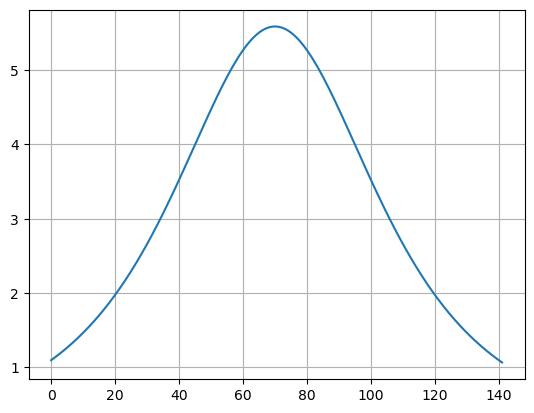

In [5]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67*10**(-11) # SI unit
rho=500 #kg/m^3
x=np.linspace(0,141,170)
z=50 #km
a=10 #km   #radius of the sphere. sphere has centre at x coordinate 70
def calculate_g(a,x,z,rho):
    term1=(4/3)*np.pi*G*rho*a**3
    term2=((x-70)**2+z**2)**(3/2)
    g=term1*(z/term2)*10**8 #mGal
    return g
    
g=calculate_g(a,x,z,rho) 
plt.plot(x,g)
plt.grid()
print(len(g))
# print(g)

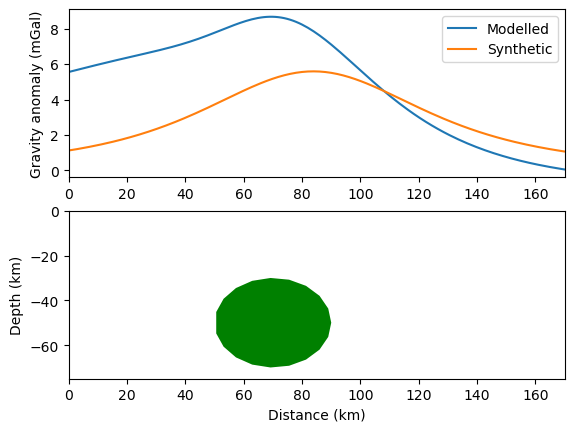

170


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, cos, sin, log, pi ,tan

def aieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate ai for given vertices and observation point."""
    return (xiplus1eq - Pxeq) + (ziplus1eq * ((xiplus1eq - Pxeq) - (xieq - Pxeq)) / (zieq - ziplus1eq))
    #in input file , the consecutive z values must be different..so that zi and z(i+1) are different
def thetaieq(xieq, zieq, Pxeq):
    """Calculate theta i for given vertex and observation point."""
    return atan2(zieq, (xieq - Pxeq))

def thetaiplus1eq(xiplus1eq, ziplus1eq, Pxeq):
    """Calculate theta i+1 for given vertex and observation point."""
    return atan2(ziplus1eq, (xiplus1eq - Pxeq))

def phiieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate phi for given vertices and observation point."""
    return atan2((ziplus1eq - zieq), ((xiplus1eq - Pxeq) - (xieq - Pxeq)))

# Setup the subplot for the subsurface bodies
plt.subplot(2, 1, 2)
maxdistance, maxdepth = 170, 75  # kilometers
Px = np.linspace(-1, maxdistance, maxdistance).tolist()
G = 6.67e-11  # Gravitational constant in m^3 kg^-1 s^-2, adjusted to correct value
# rho=500
input_file = open('gravity_input_data5.txt', 'r')
readfile = input_file.read()
allbodies = readfile.split('Body ')[1:]
Zsummed = np.zeros(len(Px))

for body in allbodies:
    lines = body.strip().split('\n')
    label = lines[0]
#     rho = float(lines[1])
    vertices = [(float(x), float(y)) for x, y in (line.split('\t') for line in lines[2:])]

    for i in range(len(vertices)):
        Z = []
        xi, zi = vertices[i]
        xiplus1, ziplus1 = vertices[(i + 1) % len(vertices)]
        
        for Pxi in Px:
            thetai = thetaieq(xi, zi, Pxi)
            thetaiplus1 = thetaiplus1eq(xiplus1, ziplus1, Pxi)
            ai = aieq(xi, zi, xiplus1, ziplus1, Pxi)
            phii = phiieq(xi, zi, xiplus1, ziplus1, Pxi)
            
            if xi == xiplus1:
                Zeq = xi * log(cos(thetai) / cos(thetaiplus1))
            elif zi == ziplus1:
                Zeq = zi * (thetaiplus1 + thetai)
            else:
                Zeq = ai * sin(phii) * cos(phii) * (thetai - thetaiplus1 + tan(phii) * log((cos(thetai) * (tan(thetai) - tan(phii))) / (cos(thetaiplus1) * (tan(thetaiplus1) - tan(phii)))))

            Z.append(Zeq)
        
        Zarray = np.array(Z)
        Zsummed += rho * Zarray
    
    plt.fill([v[0] for v in vertices], [v[1] for v in vertices], 'green')

V = -2 * G * Zsummed * 1e7  # Convert to mGal (1e5 factor for conversion from m/s^2)
depthparameters = [0, maxdistance, -maxdepth, 0]
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.axis(depthparameters)


g=calculate_g(a,x,z,rho)  
# Gravity Plot
plt.subplot(2, 1, 1)
plt.plot(Px, V, label='Modelled')
plt.plot(Px, g, label='Synthetic')
plt.legend(loc='upper right', fontsize='medium')
plt.legend(loc='upper right', fontsize='medium')
plt.ylabel('Gravity anomaly (mGal)')
plt.xlim(0, maxdistance)
plt.show()
print(len(V))


In [7]:
import math

def pearson_correlation_coefficient(x, y):
    n = len(x)   
    # Calculate means
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
    # Calculate covariance and variances
    cov = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    var_x = sum((xi - mean_x) ** 2 for xi in x)
    var_y = sum((yi - mean_y) ** 2 for yi in y)
    
    # Calculate correlation coefficient
    correlation_coefficient = cov / math.sqrt(var_x * var_y)
    
    return correlation_coefficient
# Example datasets
x =g
y =V
# Calculate Pearson's correlation coefficient
correlation_coefficient = pearson_correlation_coefficient(x, y)
print("Pearson's correlation coefficient:", correlation_coefficient)

Pearson's correlation coefficient: 0.5972770639889762


In [8]:
# import numpy as np
# import matplotlib.pyplot as plt
# from math import atan2, cos, sin, log, pi, tan

# # Constants
# G = 6.67e-11  # Gravitational constant in m^3 kg^-1 s^-2
# maxdistance, maxdepth = 170, 75  # Maximum distance and depth in kilometers

# # Theoretical gravity calculation for a sphere
# def calculate_g(a, x, z, rho):
#     term1 = (4/3) * np.pi * G * rho * a**3
#     term2 = ((x-70)**2 + z**2)**(1.5)
#     g = term1 * (z / term2) * 1e8  # Convert to mGal
#     return g

# # Functions to compute angles and other geometry-based terms
# def aieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
#     return (xiplus1eq - Pxeq) + (ziplus1eq * ((xiplus1eq - Pxeq) - (xieq - Pxeq)) / (zieq - ziplus1eq))

# def thetaieq(xieq, zieq, Pxeq):
#     return atan2(zieq, (xieq - Pxeq))

# def thetaiplus1eq(xiplus1eq, ziplus1eq, Pxeq):
#     return atan2(ziplus1eq, (xiplus1eq - Pxeq))

# def phiieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
#     return atan2((ziplus1eq - zieq), ((xiplus1eq - Pxeq) - (xieq - Pxeq)))

# # Pearson correlation function
# def pearson_correlation_coefficient(x, y):
#     mean_x, mean_y = np.mean(x), np.mean(y)
#     cov = np.mean((x - mean_x) * (y - mean_y))
#     var_x = np.mean((x - mean_x)**2)
#     var_y = np.mean((y - mean_y)**2)
#     correlation_coefficient = cov / np.sqrt(var_x * var_y)
#     return correlation_coefficient


In [9]:
# # Read and process input data for subsurface bodies
# input_file = open('gravity_input_data.txt', 'r')
# readfile = input_file.read()
# allbodies = readfile.split('Body ')[1:]
# Px = np.linspace(-1, maxdistance, maxdistance)

# # Initialize the array to store summed gravitational effects
# Zsummed = np.zeros(len(Px))

# # Process each body to compute gravitational effects
# for body in allbodies:
#     lines = body.strip().split('\n')
#     vertices = [(float(x), float(y)) for x, y in (line.split('\t') for line in lines[2:])]
# #     rho = float(lines[1])  # Assuming second line is density

#     for i in range(len(vertices)):
#         Z = []
#         xi, zi = vertices[i]
#         xiplus1, ziplus1 = vertices[(i + 1) % len(vertices)]
        
#         for Pxi in Px:
#             thetai = thetaieq(xi, zi, Pxi)
#             thetaiplus1 = thetaiplus1eq(xiplus1, ziplus1, Pxi)
#             ai = aieq(xi, zi, xiplus1, ziplus1, Pxi)
#             phii = phiieq(xi, zi, xiplus1, ziplus1, Pxi)
            
#             if xi == xiplus1:
#                 Zeq = xi * log(cos(thetai) / cos(thetaiplus1))
#             elif zi == ziplus1:
#                 Zeq = zi * (thetaiplus1 - thetai)
#             else:
#                 Zeq = ai * sin(phii) * cos(phii) * (thetai - thetaiplus1 + tan(phii) * log((cos(thetai) * (tan(thetai) - tan(phii))) / (cos(thetaiplus1) * (tan(thetaiplus1) - tan(phii)))))
#             Z.append(Zeq)
        
#         Zsummed += rho * np.array(Z)

# V = -2 * G * Zsummed * 1e7  # Convert to mGal

# # Theoretical gravity anomaly due to a spherical body
# x = np.linspace(0, 141, 170)
# a, z = 10, 50  # Radius and depth in kilometers

# # Varying densities
# rho_values = np.linspace(100, 500,200000)  
# best_rho, best_correlation, best_V = 0, -1, []

# for rho in rho_values:
#     g = calculate_g(a, x, z, rho)
#     correlation_coefficient = pearson_correlation_coefficient(g, V)
#     if correlation_coefficient > best_correlation:
#         best_correlation = correlation_coefficient
#         best_rho = rho
#         best_V = V.copy()

# print(f"Density related to best accuracy: {best_rho} kg/m^3, Best Pearson Correlation: {best_correlation:.4f}")

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
# plt.plot(Px, best_V, label='Modelled Anomaly')
# plt.plot(Px, g, label='Theoretical Anomaly', linestyle='--')
# plt.legend(loc='upper right')
# plt.xlabel('Distance (km)')
# plt.ylabel('Gravity anomaly (mGal)')
# plt.show()


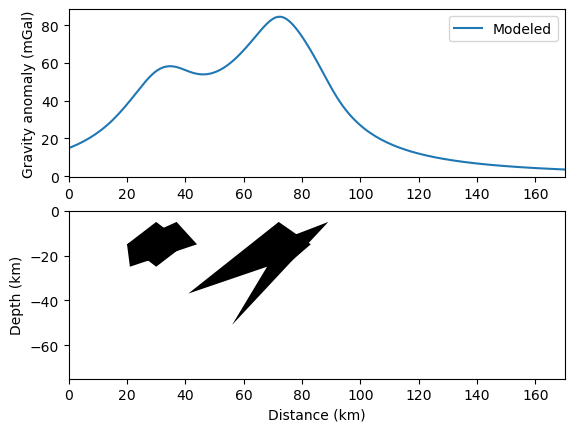

170


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, cos, sin, log, pi ,tan

def aieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate ai for given vertices and observation point."""
    return (xiplus1eq - Pxeq) + (ziplus1eq * ((xiplus1eq - Pxeq) - (xieq - Pxeq)) / (zieq - ziplus1eq))
    #in input file , the consecutive z values must be different..so that zi and z(i+1) are different
def thetaieq(xieq, zieq, Pxeq):
    """Calculate theta i for given vertex and observation point."""
    return atan2(zieq, (xieq - Pxeq))

def thetaiplus1eq(xiplus1eq, ziplus1eq, Pxeq):
    """Calculate theta i+1 for given vertex and observation point."""
    return atan2(ziplus1eq, (xiplus1eq - Pxeq))

def phiieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate phi for given vertices and observation point."""
    return atan2((ziplus1eq - zieq), ((xiplus1eq - Pxeq) - (xieq - Pxeq)))

# Setup the subplot for the subsurface bodies
plt.subplot(2, 1, 2)
maxdistance, maxdepth = 170, 75  # kilometers
Px = np.linspace(-1, maxdistance, maxdistance).tolist()
G = 6.67e-11  # Gravitational constant in m^3 kg^-1 s^-2, adjusted to correct value
# rho=500
input_file = open('gravity_input_data1.txt', 'r')
readfile = input_file.read()
allbodies = readfile.split('Body ')[1:]
Zsummed = np.zeros(len(Px))

for body in allbodies:
    lines = body.strip().split('\n')
    label = lines[0]
    rho = float(lines[1])
    vertices = [(float(x), float(y)) for x, y in (line.split('\t') for line in lines[2:])]

    for i in range(len(vertices)):
        Z = []
        xi, zi = vertices[i]
        xiplus1, ziplus1 = vertices[(i + 1) % len(vertices)]
        
        for Pxi in Px:
            thetai = thetaieq(xi, zi, Pxi)
            thetaiplus1 = thetaiplus1eq(xiplus1, ziplus1, Pxi)
            ai = aieq(xi, zi, xiplus1, ziplus1, Pxi)
            phii = phiieq(xi, zi, xiplus1, ziplus1, Pxi)
            
            if xi == xiplus1:
                Zeq = xi * log(cos(thetai) / cos(thetaiplus1))
            elif zi == ziplus1:
                Zeq = zi * (thetaiplus1 + thetai)
            else:
                Zeq = ai * sin(phii) * cos(phii) * (thetai - thetaiplus1 + tan(phii) * log((cos(thetai) * (tan(thetai) - tan(phii))) / (cos(thetaiplus1) * (tan(thetaiplus1) - tan(phii)))))

            Z.append(Zeq)
        
        Zarray = np.array(Z)
        Zsummed += rho * Zarray
    
    plt.fill([v[0] for v in vertices], [v[1] for v in vertices], 'black')

V = 2 * G * Zsummed * 1e8  # Convert to mGal (1e5 factor for conversion from m/s^2)
depthparameters = [0, maxdistance, -maxdepth, 0]
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.axis(depthparameters)



# Gravity Plot
plt.subplot(2, 1, 1)
plt.plot(Px, V, label='Modeled')
# plt.plot(Px, g, label='Theoretical')
plt.legend(loc='upper right', fontsize='medium')
# plt.legend(loc='upper right', fontsize='medium')
plt.ylabel('Gravity anomaly (mGal)')
plt.xlim(0, maxdistance)
plt.show()
print(len(V))


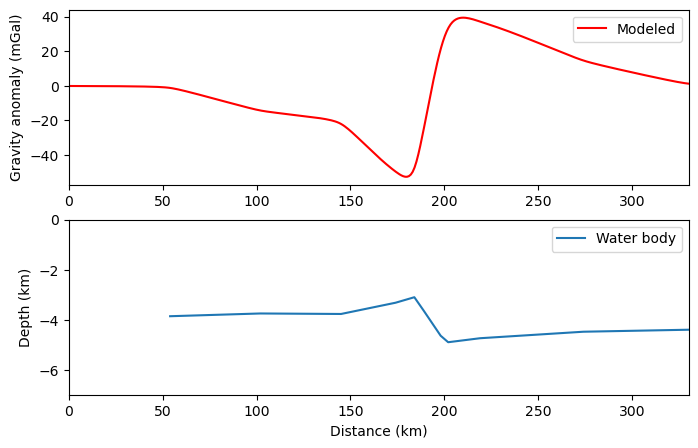

330


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, cos, sin, log, pi, tan

def aieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate ai for given vertices and observation point."""
    return (xiplus1eq - Pxeq) + (ziplus1eq * ((xiplus1eq - Pxeq) - (xieq - Pxeq)) / (zieq - ziplus1eq))

def thetaieq(xieq, zieq, Pxeq):
    """Calculate theta i for given vertex and observation point."""
    return atan2(zieq, (xieq - Pxeq))

def thetaiplus1eq(xiplus1eq, ziplus1eq, Pxeq):
    """Calculate theta i+1 for given vertex and observation point."""
    return atan2(ziplus1eq, (xiplus1eq - Pxeq))

def phiieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate phi for given vertices and observation point."""
    return atan2((ziplus1eq - zieq), ((xiplus1eq - Pxeq) - (xieq - Pxeq)))

# Setup the figure
plt.figure(figsize=(8,5))

# Setup the subplot for the subsurface bodies
plt.subplot(2, 1, 2)  # Second subplot
maxdistance, maxdepth = 330, 7  # kilometers
Px = np.linspace(-1, maxdistance, maxdistance).tolist()

G = 6.67e-11  # Gravitational constant in m^3 kg^-1 s^-2
input_file = open('gravity_input_data4.txt', 'r')
readfile = input_file.read()
allbodies = readfile.split('Body ')[1:]
Zsummed = np.zeros(len(Px))

for body in allbodies:
    lines = body.strip().split('\n')
    label = lines[0]
    rho_v = float(lines[1])
    vertices = [(float(x), float(y)) for x, y in (line.split('\t') for line in lines[2:])]

    for i in range(len(vertices)):
        Z = []
        xi, zi = vertices[i]
        xiplus1, ziplus1 = vertices[(i + 1) % len(vertices)]
        
        for Pxi in Px:
            thetai = thetaieq(xi, zi, Pxi)
            thetaiplus1 = thetaiplus1eq(xiplus1, ziplus1, Pxi)
            ai = aieq(xi, zi, xiplus1, ziplus1, Pxi)
            phii = phiieq(xi, zi, xiplus1, ziplus1, Pxi)

            if xi == xiplus1:
                Zeq = xi * log(cos(thetai) / cos(thetaiplus1))
            elif zi == ziplus1:
                Zeq = zi * (thetaiplus1 - thetai)
            else:
                Zeq = ai * sin(phii) * cos(phii) * (thetai - thetaiplus1 + tan(phii) * log((cos(thetai) * (tan(thetai) - tan(phii))) / (cos(thetaiplus1) * (tan(thetaiplus1) - tan(phii)))))

            Z.append(Zeq)

        Zarray = np.array(Z)
        Zsummed += rho_v * Zarray
    
    plt.plot([v[0] for v in vertices], [-v[1] for v in vertices], label='Water body')  # negative depth for display
    
V = 2 * G * Zsummed * 1e8  # Convert to mGal (1e5 factor for conversion from m/s^2)
depthparameters = [0, maxdistance, -maxdepth, 0]
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.axis(depthparameters)
plt.legend()
# plt.title('Water body')

# Gravity Plot
plt.subplot(2, 1, 1)
plt.plot(Px, V, label='Modeled',color='red')
# plt.plot(Px, g, label='Theoretical')
plt.legend(loc='upper right', fontsize='medium')
# plt.legend(loc='upper right', fontsize='medium')
plt.ylabel('Gravity anomaly (mGal)')
plt.xlim(0, maxdistance)
plt.show()
print(len(V))


In [12]:
import numpy as np

# Original vertices copied from your provided data
original_vertices = [
    (90.00, -50.00001),
    (89.74, -46.79),
    (88.97, -43.67),
    (87.71, -40.71),
    (85.99, -37.99),
    (83.85, -35.58),
    (81.36, -33.54),
    (78.57, -31.93),
    (75.56, -30.79),
    (72.41, -30.15),
    (69.19, -30.02),
    (66.00, -30.40),
    (62.91, -31.30),
    (60.00, -32.68),
    (57.35, -34.51),
    (55.03, -36.74),
    (53.10, -39.31),
    (51.60, -42.16),
    (50.58, -45.21),
    (50.06, -48.39),
    (50.06, -51.61),
    (50.58, -54.79),
    (51.60, -57.84),
    (53.10, -60.69),
    (55.03, -63.26),
    (57.35, -65.49),
    (60.00, -67.32),
    (62.91, -68.70),
    (66.00, -69.60),
    (69.19, -69.98),
    (72.41, -69.85),
    (75.56, -69.21),
    (78.57, -68.07),
    (81.36, -66.46),
    (83.85, -64.42),
    (85.99, -62.01),
    (87.71, -59.29),
    (88.97, -56.33),
    (89.74, -53.21),
    (90.00, -50.0001)
]

# Function to reduce points
def reduce_points(vertices, num_points):
    indices = np.round(np.linspace(0, len(vertices) - 1, num_points)).astype(int)
    return [vertices[i] for i in indices]

# Reduce to 20 points
reduced_vertices = reduce_points(original_vertices, 20)

# Print reduced points
for v in reduced_vertices:
    print(f"{v[0]}\t{v[1]}")


90.0	-50.00001
88.97	-43.67
85.99	-37.99
81.36	-33.54
75.56	-30.79
69.19	-30.02
62.91	-31.3
57.35	-34.51
53.1	-39.31
50.58	-45.21
50.58	-54.79
53.1	-60.69
57.35	-65.49
62.91	-68.7
69.19	-69.98
75.56	-69.21
81.36	-66.46
85.99	-62.01
88.97	-56.33
90.0	-50.0001


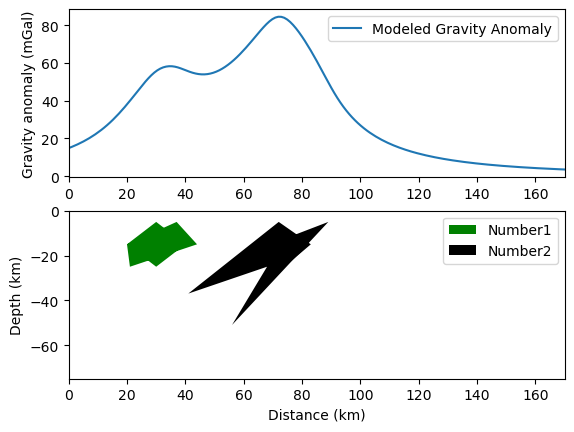

170


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, cos, sin, log, pi, tan

def aieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate ai for given vertices and observation point."""
    return (xiplus1eq - Pxeq) + (ziplus1eq * ((xiplus1eq - Pxeq) - (xieq - Pxeq)) / (zieq - ziplus1eq))

def thetaieq(xieq, zieq, Pxeq):
    """Calculate theta i for given vertex and observation point."""
    return atan2(zieq, (xieq - Pxeq))

def thetaiplus1eq(xiplus1eq, ziplus1eq, Pxeq):
    """Calculate theta i+1 for given vertex and observation point."""
    return atan2(ziplus1eq, (xiplus1eq - Pxeq))

def phiieq(xieq, zieq, xiplus1eq, ziplus1eq, Pxeq):
    """Calculate phi for given vertices and observation point."""
    return atan2((ziplus1eq - zieq), ((xiplus1eq - Pxeq) - (xieq - Pxeq)))

plt.subplot(2, 1, 2)
maxdistance, maxdepth = 170, 75  # kilometers
Px = np.linspace(-1, maxdistance, maxdistance).tolist()
G = 6.67e-11  # Gravitational constant in m^3 kg^-1 s^-2, adjusted to correct value
input_file = open('gravity_input_data1.txt', 'r')
readfile = input_file.read()
allbodies = readfile.split('Body ')[1:]
Zsummed = np.zeros(len(Px))

# Define colors for each body
body_colors = ['green', 'black']

for body_index, body in enumerate(allbodies):
    lines = body.strip().split('\n')
    label = lines[0]
    rho = float(lines[1])
    vertices = [(float(x), float(y)) for x, y in (line.split('\t') for line in lines[2:])]

    Z = np.zeros(len(Px))
    for i in range(len(vertices)):
        xi, zi = vertices[i]
        xiplus1, ziplus1 = vertices[(i + 1) % len(vertices)]
        
        for j, Pxi in enumerate(Px):
            thetai = thetaieq(xi, zi, Pxi)
            thetaiplus1 = thetaiplus1eq(xiplus1, ziplus1, Pxi)
            ai = aieq(xi, zi, xiplus1, ziplus1, Pxi)
            phii = phiieq(xi, zi, xiplus1, ziplus1, Pxi)
            
            if xi == xiplus1:
                Zeq = xi * log(cos(thetai) / cos(thetaiplus1))
            elif zi == ziplus1:
                Zeq = zi * (thetaiplus1 - thetai)
            else:
                Zeq = ai * sin(phii) * cos(phii) * (thetai - thetaiplus1 + tan(phii) * log((cos(thetai) * (tan(thetai) - tan(phii))) / (cos(thetaiplus1) * (tan(thetaiplus1) - tan(phii)))))
            Z[j] += Zeq
    
    Zsummed += rho * Z
    plt.fill([v[0] for v in vertices], [v[1] for v in vertices], body_colors[body_index % len(body_colors)], label=label)

plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.axis([0, maxdistance, -maxdepth, 0])
plt.legend()

plt.subplot(2, 1, 1)
V = 2 * G * Zsummed * 1e8  # Convert to mGal (1e5 factor for conversion from m/s^2)
plt.plot(Px, V, label='Modeled Gravity Anomaly')
plt.ylabel('Gravity anomaly (mGal)')
plt.xlim(0, maxdistance)
plt.legend(loc='upper right', fontsize='medium')
plt.show()

print(len(V))
